In [1]:
import pandas as pd
import tensorflow.keras.layers as Layer
from tensorflow.keras.layers import LSTM
from tensorflow.keras import optimizers, Sequential, Model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
import matplotlib.pyplot as plt

In [2]:
path_train1 = "/kaggle/input/batadal-a-dataset-for-cyber-attack-detection/training_dataset_1.csv"
path_train2 = "/kaggle/input/batadal-a-dataset-for-cyber-attack-detection/training_dataset_2.csv"
df_train1 = pd.read_csv(path_train1 ).set_index("DATETIME")
df_train2 = pd.read_csv(path_train2).set_index("DATETIME")

**Data fields annotation**
* L_T #: water level of a tank # [meter].​
* S_PU # or S_V # : status of a pump # or a valve # [dmnl]. Binary signal.​
* F_PU # or F_V # : flowrate of a pump # or a valve # [L/s].​
* P_J # : inlet and outlet pressure for a junction # [meter].

In [3]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8761 entries, 06/01/14 00 to 06/01/15 00
Data columns (total 44 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   L_T1      8761 non-null   float64
 1   L_T2      8761 non-null   float64
 2   L_T3      8761 non-null   float64
 3   L_T4      8761 non-null   float64
 4   L_T5      8761 non-null   float64
 5   L_T6      8761 non-null   float64
 6   L_T7      8761 non-null   float64
 7   F_PU1     8761 non-null   float64
 8   S_PU1     8761 non-null   int64  
 9   F_PU2     8761 non-null   float64
 10  S_PU2     8761 non-null   int64  
 11  F_PU3     8761 non-null   int64  
 12  S_PU3     8761 non-null   int64  
 13  F_PU4     8761 non-null   float64
 14  S_PU4     8761 non-null   int64  
 15  F_PU5     8761 non-null   int64  
 16  S_PU5     8761 non-null   int64  
 17  F_PU6     8761 non-null   float64
 18  S_PU6     8761 non-null   int64  
 19  F_PU7     8761 non-null   float64
 20  S_PU7     8761 non

In [4]:
df_train1.head()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
DATETIME,,,,,,,,,,,,,,,,,,,,,
06/01/14 00,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,1,99.018150,...,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471,0
06/01/14 01,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,1,99.115639,...,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256,0
06/01/14 02,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,1,98.440498,...,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538,0
06/01/14 03,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,1,97.594460,...,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952,0
06/01/14 04,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,1,97.370277,...,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263,0


In [5]:
df_train1.index = pd.to_datetime(df_train1.index)

<ipython-input-5-0a13ec8f2a5c>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train1.index = pd.to_datetime(df_train1.index)


In [6]:
df = df_train1.sort_index()
#the data is sorted now

In [7]:
df.head()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
DATETIME,,,,,,,,,,,,,,,,,,,,,
2014-01-02 00:00:00,3.240672,3.991420,3.843196,2.223121,3.849884,5.500000,3.909786,95.909775,1,95.928574,...,90.988274,28.464462,85.967476,21.521133,83.298821,21.413273,70.749039,31.379051,30.479050,0
2014-01-02 01:00:00,3.193655,4.019978,4.376634,2.667469,3.693818,5.500000,4.300484,95.144905,1,95.163483,...,92.240417,28.545708,87.450745,28.412626,63.646431,28.300648,75.606087,31.463921,30.563919,0
2014-01-02 02:00:00,3.299304,4.098649,4.932799,3.303904,3.096147,5.424393,4.623936,94.194862,1,94.213158,...,92.298241,28.692249,87.809013,31.468645,63.608868,31.468645,59.836674,31.638756,30.738754,0
2014-01-02 03:00:00,3.521079,4.312206,5.207924,3.917716,2.604390,5.132380,3.308000,93.594315,1,93.612434,...,75.643051,30.227625,88.810638,31.853157,63.287579,31.853157,59.138420,32.842609,31.942610,0
2014-01-02 04:00:00,3.728304,4.745680,4.953731,4.402669,2.147794,5.041366,2.763106,92.611099,1,92.628937,...,76.387177,33.153492,68.834084,29.577484,63.177700,29.457525,72.762070,35.444290,34.544289,0


In [8]:
print(f"Min date from train set: {df.index.min()}")

Min date from train set: 2014-01-02 00:00:00


In [9]:
print(f"Max date from train set: {df.index.max()}")

Max date from train set: 2015-06-01 00:00:00


<Axes: title={'center': 'Distribution of flowrate of a pump 1  Readings'}>

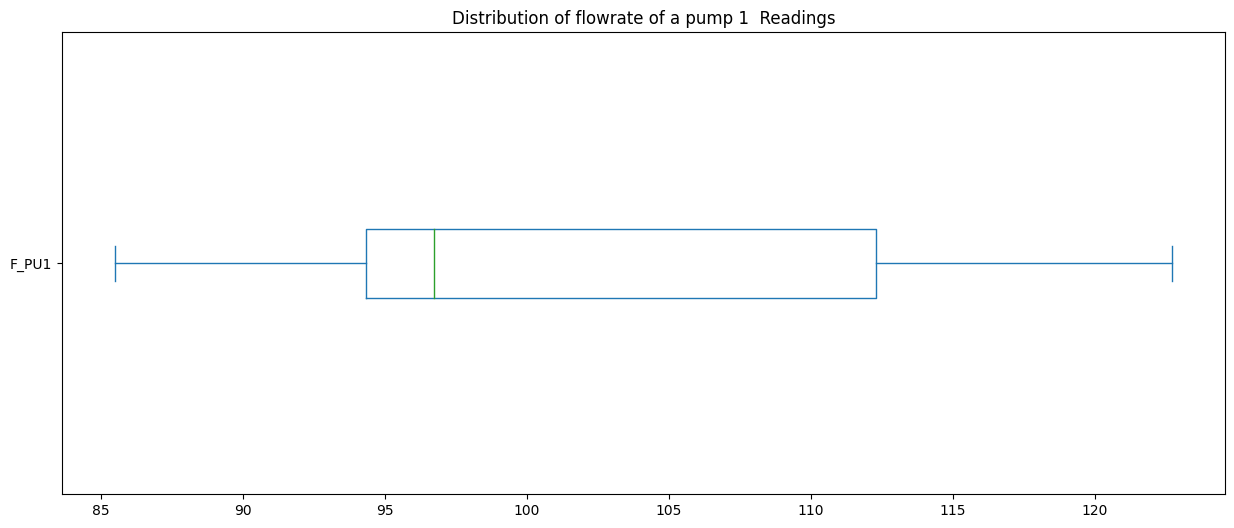

In [10]:
fig, ax = plt.subplots(figsize=(15, 6))
df_train1["F_PU1"].plot(
 kind = "box",
 vert= False ,
 title = "Distribution of flowrate of a pump 1  Readings" , 
 ax = ax
)

<Axes: title={'center': 'Time Series'}, xlabel='F_PU1'>

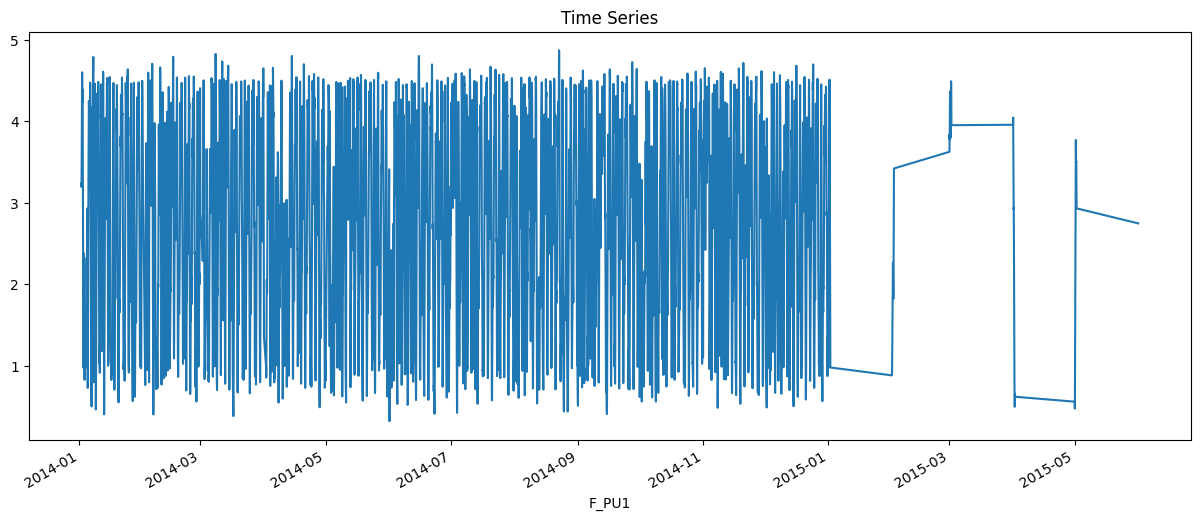

In [11]:
fig, ax = plt.subplots(figsize=(15, 6))
df["L_T1"].plot(
  xlabel= "F_PU1",
  title = "Time Series",
  ax=ax
)

<Axes: title={'center': 'Time Series'}, xlabel='F_PU1'>

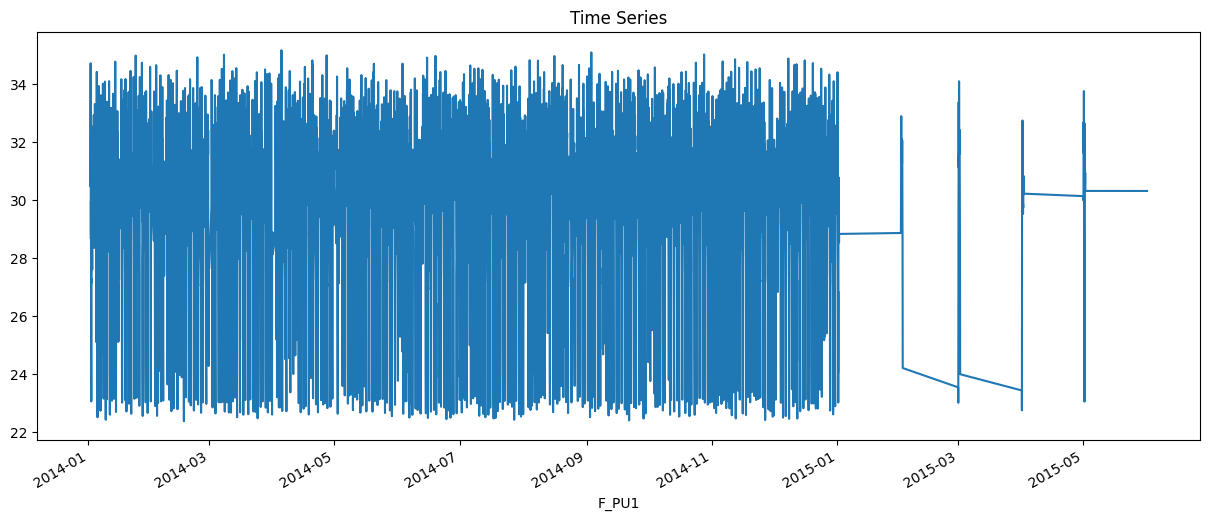

In [12]:
fig, ax = plt.subplots(figsize=(15, 6))
df["P_J422"].plot(
  xlabel= "F_PU1",
  title = "Time Series",
  ax=ax
)


In [13]:
df[df.index > "2015-01-02"]

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
DATETIME,,,,,,,,,,,,,,,,,,,,,
2015-02-01 00:00:00,0.882008,2.380006,4.122334,2.050660,3.648595,5.500000,2.136291,97.769302,1,97.788651,...,90.512627,26.857725,84.314499,26.044291,61.925079,25.928627,71.397690,29.759970,28.859970,0
2015-02-01 01:00:00,0.969725,2.400537,4.638626,2.251143,2.801610,5.500000,2.756792,97.476273,1,97.495529,...,90.343956,26.897053,85.808373,26.188721,63.315170,26.072355,71.189507,29.798782,28.898783,0
2015-02-01 02:00:00,1.069915,2.440252,5.135147,2.725773,2.310026,5.500000,3.241731,97.252266,1,97.271461,...,91.650978,26.960958,86.168739,26.487801,62.596184,26.378880,75.194511,29.857954,28.957954,0
2015-02-01 03:00:00,1.196374,2.697815,5.102686,3.204543,1.773281,5.500000,4.307876,96.186386,1,96.205269,...,75.845581,28.430496,88.410866,27.048441,62.641518,26.942038,76.992126,31.012020,30.112020,0
2015-02-01 04:00:00,1.408648,3.080477,4.867542,3.931572,1.655862,5.352430,4.119050,95.843376,1,95.862152,...,76.452332,28.777607,89.099945,26.451693,86.252747,26.451693,60.856697,31.351913,30.451914,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-05-01 20:00:00,3.349998,3.393529,3.704372,3.318569,1.976920,5.500000,4.797106,96.594833,1,96.613831,...,71.224411,28.940384,84.560669,21.076448,81.414070,20.970821,71.399384,31.532953,30.632954,0
2015-05-01 21:00:00,3.262380,3.738153,3.319207,3.162533,2.355615,5.207708,3.493474,96.445862,1,96.464813,...,69.354080,29.247887,84.673790,26.999941,83.265991,26.999941,52.213036,31.836996,30.936996,0
2015-05-01 22:00:00,3.114685,3.948144,3.123156,3.060679,2.593729,4.997561,2.207609,96.929070,1,96.948166,...,86.823753,28.358240,84.593727,20.571791,81.679344,20.457272,66.498741,31.281141,30.381142,0


In [14]:
#sn.heatmap(df.corr())

In [15]:
df["ATT_FLAG"].value_counts()

ATT_FLAG
0    8761
Name: count, dtype: int64

In [16]:
df.select_dtypes(include='float').nunique()

L_T1      8760
L_T2      8756
L_T3      8753
L_T4      8758
L_T5      8757
L_T6      4179
L_T7      8752
F_PU1     8743
F_PU2     6386
F_PU4     3695
F_PU6       17
F_PU7     7377
F_PU8     5193
F_PU10    7113
F_PU11       5
F_V2      6384
P_J280    7258
P_J269    8746
P_J300    8741
P_J256    8749
P_J289    8741
P_J415    8726
P_J302    8758
P_J306    8738
P_J307    8758
P_J317    8735
P_J14     8755
P_J422    8735
dtype: int64

In [17]:
df["P_J280"].value_counts()

P_J280
2.975281    4
2.975892    4
2.974871    4
2.975213    4
2.975739    4
           ..
2.975979    1
2.977111    1
2.976843    1
2.975214    1
2.990170    1
Name: count, Length: 7258, dtype: int64

In [18]:
df["F_PU6"].value_counts()

F_PU6
0.000000     8745
36.843212       1
36.145176       1
37.081989       1
35.775036       1
37.484451       1
36.869057       1
36.518726       1
37.808529       1
37.400818       1
36.491943       1
36.523685       1
36.835171       1
36.573368       1
36.353855       1
35.757030       1
36.610294       1
Name: count, dtype: int64

In [19]:
df["S_PU1"].value_counts()

S_PU1
1    8761
Name: count, dtype: int64

In [20]:
df.select_dtypes(include='int').nunique()

S_PU1       1
S_PU2       2
F_PU3       1
S_PU3       1
S_PU4       2
F_PU5       1
S_PU5       1
S_PU6       2
S_PU7       2
S_PU8       2
F_PU9       1
S_PU9       1
S_PU10      2
S_PU11      2
S_V2        2
ATT_FLAG    1
dtype: int64

In [21]:
columns_todrop= [ "ATT_FLAG" ,  "S_PU1","F_PU6" ,"S_PU9" , "F_PU9" ,  "S_PU5" , "F_PU5" , "S_PU3" , "F_PU3"]

In [22]:
df.drop(columns= columns_todrop , inplace = True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8761 entries, 2014-01-02 00:00:00 to 2015-06-01 00:00:00
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   L_T1    8761 non-null   float64
 1   L_T2    8761 non-null   float64
 2   L_T3    8761 non-null   float64
 3   L_T4    8761 non-null   float64
 4   L_T5    8761 non-null   float64
 5   L_T6    8761 non-null   float64
 6   L_T7    8761 non-null   float64
 7   F_PU1   8761 non-null   float64
 8   F_PU2   8761 non-null   float64
 9   S_PU2   8761 non-null   int64  
 10  F_PU4   8761 non-null   float64
 11  S_PU4   8761 non-null   int64  
 12  S_PU6   8761 non-null   int64  
 13  F_PU7   8761 non-null   float64
 14  S_PU7   8761 non-null   int64  
 15  F_PU8   8761 non-null   float64
 16  S_PU8   8761 non-null   int64  
 17  F_PU10  8761 non-null   float64
 18  S_PU10  8761 non-null   int64  
 19  F_PU11  8761 non-null   float64
 20  S_PU11  8761 non-null   int64  
 21  F

In [24]:
df = df.loc[:"2015-01-02"]
df.tail()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,F_PU2,S_PU2,...,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422
DATETIME,,,,,,,,,,,,,,,,,,,,,
2015-01-01 19:00:00,2.630836,2.269541,4.114308,3.411017,2.461866,5.459344,2.858364,118.968697,0.000000,0,...,29.458241,69.503487,29.458241,61.302082,19.108356,81.633247,18.999174,67.685829,31.677206,30.777206
2015-01-01 20:00:00,2.224736,2.644429,3.653107,2.631565,2.881007,5.500000,3.167428,119.851708,0.000000,0,...,27.661652,69.485313,27.620693,84.385323,18.622650,81.683350,18.513851,67.389603,30.115118,29.215117
2015-01-01 21:00:00,1.819530,2.795843,3.206800,2.686036,3.288416,5.500000,2.933670,121.098823,0.000000,0,...,27.658400,69.482758,27.616629,83.314919,17.855772,80.802048,17.748981,67.609985,30.080553,29.180553
2015-01-01 22:00:00,1.378862,2.689903,3.229645,2.293066,3.525218,5.500000,2.831553,121.698364,0.000000,0,...,26.577337,87.954277,26.644943,83.243561,17.464388,81.213585,17.355026,65.956146,29.431831,28.531832
2015-01-01 23:00:00,0.978772,2.447031,3.690032,2.112592,3.838538,5.395741,2.183430,99.367851,99.387665,1,...,26.774715,87.552437,26.844282,83.449646,18.887032,82.163971,18.775932,66.517029,29.727757,28.827757


In [25]:
scaler = MinMaxScaler() 
for i in df.columns:
    df[i]  =  scaler.fit_transform(df[[i]]) 
df.head()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,F_PU2,S_PU2,...,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422
DATETIME,,,,,,,,,,,,,,,,,,,,,
2014-01-02 00:00:00,0.641710,0.688565,0.376582,0.082197,0.890976,1.000000,0.723773,0.279883,0.957938,1.0,...,0.591615,0.867132,0.594652,0.609640,0.312325,0.812710,0.315430,0.428294,0.210242,0.633927
2014-01-02 01:00:00,0.631379,0.693883,0.585759,0.247472,0.836588,1.000000,0.822799,0.259328,0.950298,1.0,...,0.598012,0.909007,0.600867,0.638613,0.632431,0.173162,0.631596,0.537482,0.215027,0.640562
2014-01-02 02:00:00,0.654592,0.708534,0.803848,0.484194,0.628303,0.888055,0.904780,0.233796,0.940808,1.0,...,0.609135,0.910941,0.612076,0.645611,0.774381,0.171940,0.777024,0.182981,0.224883,0.654230
2014-01-02 03:00:00,0.703321,0.748303,0.911733,0.712501,0.456928,0.455697,0.571246,0.217657,0.934809,1.0,...,0.733769,0.353941,0.729516,0.665176,0.792241,0.161484,0.794675,0.167284,0.292750,0.748343
2014-01-02 04:00:00,0.748853,0.829025,0.812056,0.892880,0.297807,0.320939,0.433138,0.191234,0.924988,1.0,...,0.953529,0.378827,0.953315,0.274968,0.686538,0.157908,0.684703,0.473548,0.439419,0.951731


In [26]:
train = df["L_T1"]

**Reshape data**
Time-series shape (data points, time-steps, features).

In [27]:
train_np =train.to_numpy()
X = []
y = []
for i in range(len(train_np) - 120):
        # Create a window of data
        row = train_np[i:i + 120]
        X.append(row)
        # The label is the next value after the window
        label = train_np[i + 120]
        y.append(label)

In [28]:
X, y = np.array(X), np.array(y)
print(f"X shape{X.shape} , y shape { y.shape}")

X shape(8544, 120) , y shape (8544,)


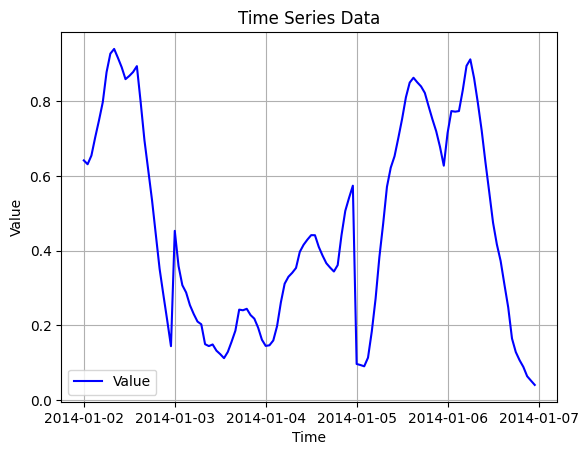

In [29]:
plt.plot(df.index[:120], df['L_T1'].head(120), label='Value', color='blue')  # Adjust 'value_column' as needed
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [30]:
split_percent = round(len(X) * 0.8  )
X_train = X[:split_percent]
y_train =  y[:split_percent]
X_test  =  X[split_percent:]
y_test  =  y[split_percent:] 

# Regular LSTM

In [31]:

epochs = 50
batch = 32
lr = 0.001
lstm_model = Sequential()
lstm_model.add(Layer.LSTM(50, input_shape=( 120, 1), return_sequences=True))
lstm_model.add(Layer.LSTM(25, activation='tanh', return_sequences=True))
lstm_model.add(Layer.LSTM(10, activation='tanh'))
#lstm_model.add(Layer.Dense(10, kernel_initializer='glorot_normal', activation='tanh'))
#lstm_model.add(Layer.Dense(10, kernel_initializer='glorot_normal', activation='tanh'))
lstm_model.add(Layer.Dense(1))
lstm_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 120, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 120, 25)             │           7,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 10)                  │           1,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,451 (75.98 KB)

 Trainable params: 19,451 (75.98 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
cp1 = ModelCheckpoint('/kaggle/working/model.keras', save_best_only=True)

lstm_model.compile(loss=MeanSquaredError(), optimizer=optimizers.Adam(learning_rate=lr), metrics=[RootMeanSquaredError()])

In [33]:
lstm_model.fit(X_train, y_train, epochs=epochs, batch_size=batch, validation_split=0.1 , verbose=1 )

Epoch 1/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0895 - root_mean_squared_error: 0.2915 - val_loss: 0.0170 - val_root_mean_squared_error: 0.1303
Epoch 2/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0122 - root_mean_squared_error: 0.1102 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0821
Epoch 3/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0055 - root_mean_squared_error: 0.0741 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0712
Epoch 4/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0039 - root_mean_squared_error: 0.0624 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0667
Epoch 5/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0039 - root_mean_squared_error: 0.0624 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0652
Epoch 6/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0035 - root_mean_squared_error: 0.0589 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0642
Epoch 7/50
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 18m

In [46]:
lstm_model.evaluate(X_train, y_train)

214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0030 - root_mean_squared_error: 0.0541


[0.0030849415343254805, 0.055542249232530594]

In [35]:
Predicted = lstm_model.predict(X_test)
Actual = y_test

54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [36]:
Predicted[:5]

array([[0.14136606],
       [0.16438174],
       [0.17392623],
       [0.171051  ],
       [0.13836351]], dtype=float32)

In [37]:
Actual[:5]

array([0.14053476, 0.15738532, 0.16215275, 0.13708086, 0.11330403])

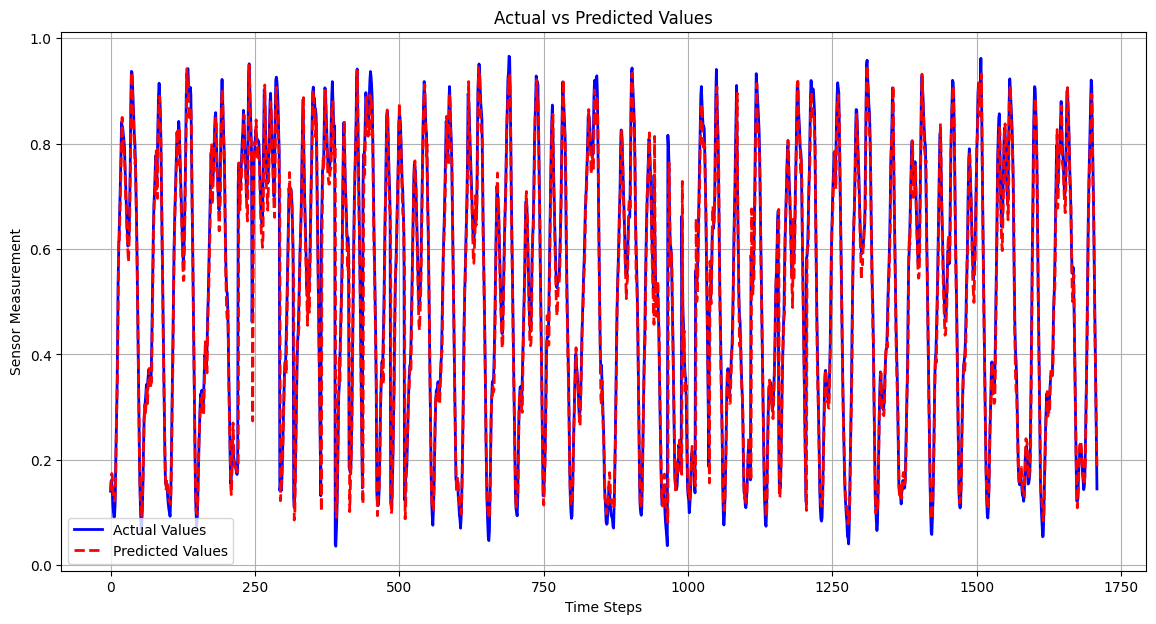

In [38]:
# Assuming Predicted and Actual are NumPy arrays
# Create a time index (for example, if you have 100 time steps)
time_steps = np.arange(len(Actual))

plt.figure(figsize=(14, 7))

# Plotting Actual Values
plt.plot(time_steps, Actual, label='Actual Values', color='blue', linewidth=2)

# Plotting Predicted Values
plt.plot(time_steps, Predicted, label='Predicted Values', color='red', linestyle='--', linewidth=2)

# Adding title and labels
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Sensor Measurement')

# Adding legend and grid
plt.legend()
plt.grid()

# Display the plot
plt.show()


In [39]:
y_test[:10]

array([0.14053476, 0.15738532, 0.16215275, 0.13708086, 0.11330403,
       0.09985005, 0.09064183, 0.09612359, 0.12084998, 0.20225385])

# LSTM Auto Encoder

In [40]:
encoder_decoder = Sequential()
encoder_decoder.add(Layer.LSTM(20, activation='tanh', input_shape=(120, 1), return_sequences=True))
encoder_decoder.add(Layer.LSTM(10, activation='tanh', return_sequences=True))
encoder_decoder.add(Layer.LSTM(5, activation='tanh'))
encoder_decoder.add(Layer.RepeatVector(120))
encoder_decoder.add(Layer.LSTM(10, activation='tanh', return_sequences=True))
encoder_decoder.add(Layer.LSTM(20, activation='tanh', return_sequences=True))
encoder_decoder.add(Layer.TimeDistributed(Layer.Dense(1)))
encoder_decoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 120, 20)             │           1,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 120, 10)             │           1,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 5)                   │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 120, 5)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 120, 10)             │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120, 20)             │           2,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 120, 1)              │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,461 (25.24 KB)

 Trainable params: 6,461 (25.24 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
encoder_decoder.compile(loss=MeanSquaredError(), optimizer=optimizers.Adam(learning_rate=lr), metrics=[RootMeanSquaredError()])

In [42]:
encoder_decoder_history = encoder_decoder.fit(X_train, y_train, 
                                              batch_size=batch, 
                                              epochs=epochs, 
                                              verbose=2)

Epoch 1/50
214/214 - 14s - 64ms/step - loss: 0.0881 - root_mean_squared_error: 0.2968
Epoch 2/50
214/214 - 6s - 26ms/step - loss: 0.0729 - root_mean_squared_error: 0.2699
Epoch 3/50
214/214 - 6s - 26ms/step - loss: 0.0716 - root_mean_squared_error: 0.2676
Epoch 4/50
214/214 - 6s - 27ms/step - loss: 0.0711 - root_mean_squared_error: 0.2666
Epoch 5/50
214/214 - 6s - 27ms/step - loss: 0.0707 - root_mean_squared_error: 0.2659
Epoch 6/50
214/214 - 6s - 26ms/step - loss: 0.0706 - root_mean_squared_error: 0.2657
Epoch 7/50
214/214 - 6s - 26ms/step - loss: 0.0704 - root_mean_squared_error: 0.2654
Epoch 8/50
214/214 - 6s - 26ms/step - loss: 0.0706 - root_mean_squared_error: 0.2658
Epoch 9/50
214/214 - 6s - 26ms/step - loss: 0.0701 - root_mean_squared_error: 0.2648
Epoch 10/50
214/214 - 6s - 27ms/step - loss: 0.0703 - root_mean_squared_error: 0.2651
Epoch 11/50
214/214 - 6s - 26ms/step - loss: 0.0702 - root_mean_squared_error: 0.2649
Epoch 12/50
214/214 - 6s - 26ms/step - loss: 0.0702 - root_mea

In [45]:
y_test[:5]

array([0.14053476, 0.15738532, 0.16215275, 0.13708086, 0.11330403])

In [49]:
pred = encoder_decoder.predict(X_test)

54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step


In [58]:
pred[1][:5]

array([[0.5093518 ],
       [0.5038134 ],
       [0.510433  ],
       [0.50901854],
       [0.5094023 ]], dtype=float32)

# Evaluate

In [64]:
df_train2.index = pd.to_datetime(df_train2.index)
df = df_train2.sort_index()
eval_df = df_train2
#the data is sorted now

<ipython-input-64-9ec2b4c79cdb>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train2.index = pd.to_datetime(df_train2.index)


In [60]:
eval_df["ATT_FLAG"].value_counts()

ATT_FLAG
0    3685
1     492
Name: count, dtype: int64

In [66]:
scaler = MinMaxScaler() 
for i in eval_df.columns:
    eval_df[i]  =  scaler.fit_transform(eval_df[[i]]) 
eval_df.head(2)

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
DATETIME,,,,,,,,,,,,,,,,,,,,,
2016-04-07 00:00:00,0.391867,0.919776,0.121569,0.784173,0.548611,1.000000,0.866521,0.654035,0.0,0.937250,...,0.136758,0.591892,0.591187,0.136014,0.662634,0.138159,0.486295,0.232103,0.579387,0.0
2016-04-07 01:00:00,0.432532,0.787313,0.125490,0.812950,0.697917,0.917808,0.897155,0.603586,0.0,0.895016,...,0.752169,0.337162,0.572672,0.277972,0.767473,0.281364,0.197306,0.289373,0.336351,0.0


In [67]:
eval = eval_df["L_T1"]
eval_np =eval.to_numpy()
X_eval = []
y_eval = []
for i in range(len(eval_np) - 120):
        # Create a window of data
        row = eval_np[i:i + 120]
        X_eval.append(row)
        # The label is the next value after the window
        label = eval_np[i + 120]
        y_eval.append(label)

In [70]:
X_eval, y_eval = np.array(X_eval), np.array(y_eval)
print(f"X shape{X_eval.shape} , y shape { y_eval.shape}")

X shape(4057, 120) , y shape (4057,)


In [71]:
predict_ano = lstm_model.predict(X_eval)

127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


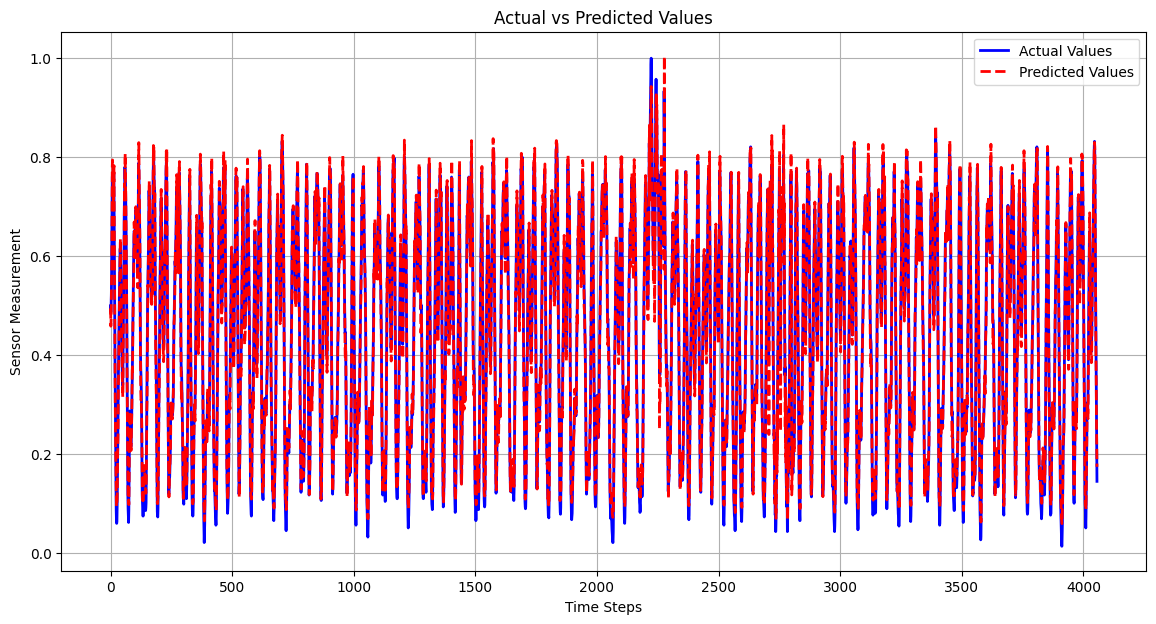

In [72]:
# Assuming Predicted and Actual are NumPy arrays
# Create a time index (for example, if you have 100 time steps)
time_steps = np.arange(len(y_eval))

plt.figure(figsize=(14, 7))

# Plotting Actual Values
plt.plot(time_steps, y_eval, label='Actual Values', color='blue', linewidth=2)

# Plotting Predicted Values
plt.plot(time_steps, predict_ano, label='Predicted Values', color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Sensor Measurement')

# Adding legend and grid
plt.legend()
plt.grid()

# Display the plot
plt.show()